<a href="https://colab.research.google.com/github/doeungim/ADP_DE/blob/main/Statistics_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
from IPython.display import display, HTML

### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [2]:
import random
import itertools
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#if ways == 'two'   :
#  sp = (1 - t.cdf(np.abs(cstat), df)) * 2
#  cv = t.ppf(1- conf_a/2 , df)

#elif ways == 'one-right' :
#  sp = 1 - t.cdf(cstat, df)
#  cv = t.ppf(1- conf_a, df)

#elif ways == 'one-left' :
#  sp = t.cdf(cstat, df)
#  cv = t.ppf(conf_a, df)

### 구간 추정  One- Sample
- 모 표준 편차를 아는 경우



In [3]:
# 1) 모표준편차를 아는 경우의 구간 추정량

x = 31100
n = 36
sigma = 4500  #모표준편차
conf_a = 0.05


from scipy.stats import norm
# SE
se = sigma / np.sqrt(n)
# 신뢰계수
conf_z = norm.ppf(1- conf_a/ 2)
# ME (허용오차) : 신뢰계수 * 오차 한계
ME = se * conf_z

# 구간 추정량
print(x - ME, x + ME)

## 1 표본 구간 추정량 (라이브러리)
print(stats.norm.interval(confidence = 0.95 , loc = x , scale = se))

29630.02701159496 32569.97298840504
(29630.02701159496, 32569.97298840504)


예제 문제 1)
 -  데이터에서 183개의 샘플을 추출했을 때 샘플 무게의 평균이 69.5g에서 70.1g 사이에 있을 확률을 구하여라

In [164]:
df = pd.read_csv("https://raw.githubusercontent.com/doeungim/ADP_DE/main/ADP_SET2/data/s5.csv")

from scipy import stats

# 모집단의 평균과 표준 편차 (가정)
mean = df['w'].mean()
std = df['w'].std()

# 샘플 크기
size = 183
standard_error = std / np.sqrt(size)

lower = 69.5
upper = 70.1

# 샘플 평균의 확률 계산
prob_range = stats.norm.cdf(upper, loc=mean, scale=std) - stats.norm.cdf(lower, loc=mean, scale=std)

print(f'183개 샘플의 평균 무게가 {lower}kg에서 {lower}kg 사이일 확률: {prob_range:.3f}')

183개 샘플의 평균 무게가 69.5kg에서 69.5kg 사이일 확률: 0.048


### One- Sample - 표본의 크기
- 모 표준 편차를 아는 경우

In [4]:
# 2) 오차의 한계가 500 이하일 확률이 0.95가 되도록 추정치를 조정
ME = 500
conf_a = 1- 0.95
conf_z = norm.ppf(1 - conf_a/ 2)

size = conf_z ** 2 * sigma ** 2 / ME ** 2
print(size)

311.15816447622416


### One- Sample - 가설검정
- 모 표준 편차를 아는 경우

In [5]:
# 3) 가설 검정
# H0: mu = mu0
# H1: mu != mu0

x = 31100
n = 36
sigma = 4500

m0 = 30000
conf_a = 0.05

# SE
se = sigma / np.sqrt(n)

# Z 통계량
z_stat = (x - m0)/ se

# Two_way
sp = (1 - norm.cdf(np.abs(z_stat)))
cv = norm.ppf(1 - conf_a /2)
print(f"유의확률 : {sp}")
print(f"임계값 : {cv} 에서의 {z_stat}")

유의확률 : 0.07123337741398617
임계값 : 1.959963984540054 에서의 1.4666666666666666


### One- Sample - 구간 추정
- 모 표준 편차를 모르는 경우

In [6]:
# 1) 모평균의 추정
x = 650 #표본평균
n = 16 #표본크기
s = 55 #표본표준편차
conf_a = 0.05 #신뢰수준(confidence level) 95% 기준
df = n-1

from scipy.stats import t

# SE
se = s / np.sqrt(n)

# conf_t
t_stat = t.ppf(1 - conf_a /2 , df)

# ME
ME = se * t_stat

print(x-ME, x+ME)

# 라이브러리 검정
print(stats.t.interval(confidence = 0.95 , df = df, loc = x , scale = se ))

620.6925687485593 679.3074312514407
(620.6925687485593, 679.3074312514407)


### One- Sample - 표본의 크기
- 모 표준 편차를 모르는 경우

In [7]:
# 2) 오차의 한계에 따른 규모
# 오차의 한계가 20 이하인 경우 확률이 0.95가 되도록 평균의 추정치를 원하는 경우

ME2 = 20
conf_t = t.ppf(1 - conf_a / 2, df)
ssize = conf_t **2 * s**2 / ME2 ** 2
print(ssize)

34.357021062316896


### One- Sample - 가설 검증
- 모 표준 편차를 모르는 경우

In [8]:
# 모평균의 가설 검정
# H0: mu = mu0,
# H1: mu > mu0 (오른쪽검정)

mu0 = 600 #귀무가설의 모평균
test_a = 0.05 #가설검정을 위한 유의수준
x = 650 #표본평균
n = 16 #표본크기
s = 55 #표본표준편차
df = n-1 #자유도

# SE
se = s / np.sqrt(n)
t_stat = (x - mu0) / se


# 우측검정
sp = 1 - t.cdf(t_stat, df)
cv = t.ppf(1- test_a, df)  # 0.95
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, t_stat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

 임계값: 1.7530503556925547, 검정통계량: 3.636
 유의수준: 0.050, 유의확률: 0.001


ADP_기출 27)
- 12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [144]:
n = 12
x =15.5
var = 3.2
conf_a = 0.1

df = n-1

# 기각역
t_cri = stats.t.ppf(1 - conf_a/2, df)

# 표준편차
s = np.sqrt(var)

# SE
se = s / np.sqrt(n)

# ME
ME = s * t_cri

print(x - ME, x + ME)

12.28742357249497 18.71257642750503


### 두 그룹 평균 비교 - 구간 추정
- 표본이 큰 경우

In [9]:
# 1) 구간 추정 - 표본이 큰 경우
data_1 = np.random.randint(10, 30, 50)
data_2 = np.random.randint(15, 30, 50)

s1 = np.var(data_1) / len(data_1)
s2 = np.var(data_2) / len(data_2)

stats.norm.interval(confidence = 0.95 ,
                    loc = np.mean(data_1 - data_2),
                    scale = s1 + s2)

(-4.0021402994803426, 0.1621402994803427)

- 표본이 큰데, 모분산을 아는 경우

In [10]:
# 2) N > 30 , 모분산을 아는 경우 - 구간추정

x1 = 78 #1번 모집단의 표본평균
x2 = 70 #2번 모집단의 표본평균

sigma1 = 4.8 #1번 모표준편차
sigma2 = 3.1 #2번 모표준편차

n1 = 16 #1번 표본 크기
n2 = 25 #2번 표본 크기

conf_a = 0.05 # 신뢰수준 95%

# 1) 차이
d = x1 - x2
# 2) SE
se = np.sqrt(sigma1**2/n1 + sigma2**2 / n2)
# 3) conf_a
conf_z = norm.ppf(1 -conf_a/2)
# 4) ME 오차의 한계
ME = conf_z * se
print("구간 추정량 :", d-ME, d+ME)
# 라이브러리 검정
print(stats.norm.interval(confidence = 0.95,
                          loc = d,
                          scale = se))

구간 추정량 : 5.352669746239741 10.64733025376026
(5.352669746239741, 10.64733025376026)


- 표본이 작은 경우

In [11]:
# 표본의 개수가 적은 경우의 구간 추정
data_1 = np.random.normal(10, 5, 15)
data_2 = np.random.normal(15, 5, 10)

n1 = len(data_1)
n2 = len(data_2)

var1 = np.var(data_1)
var2 = np.var(data_2)

# 합동 분산
s_pooled = (n1 - 1) * var1 + (n2 -1) * var2 / (n1 + n2 - 2)
# 차이
d = np.mean(data_1) - np.mean(data_2)

stats.t.interval(confidence = 0.95,
                 df = n1 + n2 - 2,
                 loc = d,
                 scale = np.sqrt(s_pooled)   * np.sqrt((1/n1) + (1/n2)))


(-23.209437780102892, 9.307393363172775)

### 두 그룹 평균 비교 - 가설 검증 (N > 30)

In [12]:
# 2) 차이의 가설 검정
# H0 : 차이 = D0
# H1 : 차이 != D0

x1 = 78 #1번 모집단의 표본평균
x2 = 70 #2번 모집단의 표본평균

sigma1 = 4.8 #1번 모표준편차
sigma2 = 3.1 #2번 모표준편차

n1 = 16 #1번 표본 크기
n2 = 25 #2번 표본 크기

conf_a = 0.05 # 신뢰수준 95%
d0 = 0


# 1) d
d = x1 - x2
# 2) df자유도
df = n1 + n2 - 2
# 3) SE
se = np.sqrt(sigma1 **2 / n1 + sigma2 **2 /n2)
# 4) z_stat
z_stat = (x1 - x2 - d0) / se

# 양측 검정
sp = 1 - norm.cdf(np.abs(z_stat)) * 2
cv = norm.ppf(1 - conf_a/ 2)
print(conf_a, cv)
print(z_stat)

0.05 1.959963984540054
5.922839379049523


### 두 그룹 평균 비교 - 가설 검증 (N < 30)

In [13]:
# 3) 표본의 크키가 30개 미만, 분산이 같다는 것을 알고 있지만, 모표준편차를 모름
# 3.1) 차이의 추정 -  합동분산을 꼭 구해야함

from scipy.stats import t

x1 = 85 #1번 모집단의 표본평균
x2 = 81 #2번 모집단의 표본평균

s1 = 4 #1번 표본표준편차
s2 = 5 #2번 표본표준편차

n1 = 12 #1번 표본 크기
n2 = 10 #2번 표본 크기

conf_a = 0.05 # 신뢰수준 95%

# 1) d
d = x1 - x2
# 2) df
df = n1 + n2 - 2
# 3) 합동분산 pv
pv = (s1**2 * (n1 -1) + s2 **2 * (n2 -1)) / df
se = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
# 4) conf_t
conf_t = t.ppf(1 - conf_a/ 2, df)
# 5) 오차의 한계
ME = se * conf_t
print(ME)
print(d - ME, d+ME)


# 3.2) 차이의 가설 검정
# H0 : 차이가 D0
# H1 : 차이가 != D0
d0 = 0
# 1) d
d = x1 - x2
# 2) 자유도
df = n1 + n2 - 2
# 3) pv 합동 분산
pv = (s1**2 *(n1-1) + s2**2 * (n2 -1)) / df
se = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)

t_stat = (x1 - x2 - d0) / se

# two way 검정
sp = (1 - t.cdf(np.abs(t_stat), df)) * 2
cv = t.ppf(1 - conf_a / 2, df)

print("검정통계량: ", t_stat)

3.9993056786131618
0.0006943213868382259 7.999305678613162
검정통계량:  2.0863255923855117


## 두 그룹 평균 검증 (라이브러리)

In [14]:
# 라이브러리를 통한 독립표본 t-test
from scipy.stats import ttest_ind
X1 = [1,3,5,7,9]
X2 = [9,11,13,15]

# equal_var: 모집단의 분산이 동일한지 여부
# alternative: 대립가설의 형태 'two-sided', 'less', 'greater'
tstat, p = ttest_ind(X1, X2, equal_var = True, alternative='two-sided')
print("[라이브러리 검정] equal_var = True, alternative='two-sided'")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}\n".format(tstat, p))

tstat, p = ttest_ind(X1, X2, equal_var = False, alternative='two-sided')
print("[라이브러리 검정] equal_var = False, alternative='two-sided'")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p))
# 두 경우 모두 귀무가설을 기각 할 수 있다.

[라이브러리 검정] equal_var = True, alternative='two-sided'
 검정통계량: -3.564, 유의확률: 0.009

[라이브러리 검정] equal_var = False, alternative='two-sided'
 검정통계량: -3.656, 유의확률: 0.008


ADP 기출 26)
- A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정

In [140]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
print(df.gender.value_counts())

m = df[df.gender == "male"]['pressure']
f = df[df.gender == "female"]['pressure']

stat, p_val = ttest_ind(m, f, equal_var= True)
print(p_val)


# 통계량을 바탕으로 신뢰구간 구하기
# 1) 평균차이
diff = m.mean() - f.mean()

# 2) 자유도
df = len(m) + len(f) - 2

# 3) 데이터 N
male_n = len(m)
female_n = len(f)

# 4) 분산
male_var = m.var()
female_var = f.var()

# 5) 합동 분산 : (n1 -1) * var1 + (n2 - 1) * var2 / n1 + n2 -2
pe = ((male_n - 1) * male_var + (female_n - 1) * female_var ) / (male_n + female_n - 2)

# 6)신뢰구간
conf_int = stats.t.interval(0.95,
                            df ,
                            loc = diff,
                            scale = (pe * (1/male_n + 1/female_n) ) ** 0.5)
print(conf_int)

gender
male      16
female     9
Name: count, dtype: int64
0.12361716364314851
(-1.8560720920085423, 14.471349869786348)


In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0
5,male,83.9
6,male,91.2
7,male,103.2
8,male,83.0
9,male,101.2


### 대응표본 모평균의 차이 추청과 가설 검정 : Z, t분포

In [96]:
from scipy.stats import t
import numpy as np
x1 = np.array([75, 83, 96, 77, 81, 90, 82, 67, 94, 85, 78, 82, 96, 80, 87, 81])
x2 = np.array([80, 90, 92, 75, 86, 90, 81, 70, 89, 88, 82, 79, 91, 90, 78, 89])


# 1) N < 30
n = len(x1)
df = n - 1
conf_a = 0.05

## 점추정/구간/오차의 한계
d = x1 - x2
d_mean = np.mean(d)   # 두 데이터 차이의 평균
std = np.sqrt(1 / df * sum((d - d_mean)**2))

se = std / np.sqrt(n)
conf_t = t.ppf(1 - conf_a / 2, df)
ME = se * conf_t

print(d_mean - ME , d_mean + ME)

# 가설 검정
d0 = 0

tstat = (d_mean - d0) / se
print(tstat)

from scipy.stats import ttest_rel
stat, p = ttest_rel(x1, x2 , alternative = "two-sided")
print(stat, p)

-3.892547973562949 1.892547973562949
-0.7368761261836121
-0.7368761261836121 0.4725666261759255


ADP_기출 25)
- 임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9 신뢰구간 95%, 차이가 존재하는지 확인하려한다

In [131]:
diff = 24
s = 9
n = 20
df = n - 1
conf_a = 0.05

# se
se = s / np.sqrt(n)

# 검정통계량
t = diff/ se

# 기각역
cv = stats.t.ppf(1 - conf_a / 2, df)
sp = (1 - stats.t.cdf(np.abs(t), df))

if abs(t) > cv :
      print("귀무가설을 기각합니다. 투약 이전과 이후의 차이가 존재합니다.")
else:
    print("귀무가설을 채택합니다. 투약 이전과 이후의 차이는 존재하지 않습니다.")

귀무가설을 기각합니다. 투약 이전과 이후의 차이가 존재합니다.


### 모비율 추청 , 가설 검정 : Z 검정

ONE SAMPLE - 구간 추정

In [15]:
# 1) 모비율 구간추정 - Z분포
n = 500 #표본 크기
p = 220/500 #표본 비율
conf_a = 0.05

from scipy.stats import norm

# SE
se = np.sqrt(p * (1 - p) / n)
# conf_z
conf_z = norm.ppf(1 - conf_a/2)
# ME
ME = se * conf_z
print(p - ME, p + ME)

0.3964905653123594 0.4835094346876406


In [16]:
# 라이브러리 - One Sample
p = 41/ 500
n = 500

se = np.sqrt(p * (1-p) / n)
print(stats.norm.interval(confidence = 0.95, loc = p , scale = se))

from statsmodels.stats.proportion import proportion_confint
print(proportion_confint(41, 500, alpha = 0.05 , method = 'normal'))

(0.05795131379112069, 0.10604868620887932)
(0.05795131379112069, 0.10604868620887932)


모비율 구간 추정 예제 문제 1)
- 한 대학교에서 3월 한 달간 신입학생 325명을 대상으로 일주일에 1회 이하로 술을 마시는 사람을 조사해본 결과 25명이었다. 99% 신뢰수준에서 모비율을 추정

In [17]:
n = 325
p = 25 / 325
conf_a = 0.01

# se
se = np.sqrt(p * (1-p) / n)
# conf_a
conf_z = norm.ppf(1- conf_a / 2)
# ME (오차의 한계)
ME = conf_z * se
print(p- ME, p+ ME)

# 라이브러리 검정
print(stats.norm.interval(confidence = 0.99, loc = p, scale = se))

0.03884958853283119 0.11499656531332267
(0.03884958853283119, 0.11499656531332267)


모비율 구간 추정 예제 문제 2)
- 시중에서 판매되는 한 제품의 불량률을 추정하려고 한다. 900대의 제품을 랜덤하게 조사하였더니 불량률이 450대였다. 판매되는 제품되는 불량률에 대한 90% 신뢰구간을

In [18]:
n = 900
p = 450 / 900
conf_a = 0.90

# 1) SE
se = np.sqrt(p * (1 - p) / n)

stats.norm.interval(confidence = conf_a , loc = p , scale = se)

(0.4725857728841421, 0.5274142271158578)

ONE SAMPLE - 표본 규모 계산

In [19]:
# 2) 모비율 표본 규모 계산
# 오차의 한계가 0.3이하일 확률이 0.99가 되도록
ME2 = 0.03
conf_a = 1 - 0.99
conf_z = norm.ppf(1 - conf_a/ 2)

ssize = conf_z **2 * p * (1- p) / ME2 **2
print(ssize)

1843.0268336170038


모비율 표본의 크기 예제 문제 1)
- 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90% 신뢰수준, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [20]:
ME = 0.05
conf_a = 1- 0.90
p = 0.5
# conf_z
conf_z = norm.ppf(1 - conf_a/2)

ssize = conf_z**2 * p * (1-p)/ ME **2



ONE SAMPLE -가설 검정

In [21]:
# 모비율의 가설검정
# H0: P = P0,
# H1: P != P0
n = 500 #표본 크기
p = 220/500 #표본 비율
P0 = 0.5 #귀무가설의 모비율
conf_a = 0.05

# 1) SE : 귀무가설의 모비율을 계산한다.
se = np.sqrt(P0 * (1- P0) / n)

# 2) z_stat
z_stat = (p -P0 ) / se

# 3) two_way
sp = 1 - (norm.cdf(np.abs(z_stat))) ** 2
cv = norm.ppf(1- conf_a / 2)
print(f"유의확률 {sp}")
print(f"임계값 {cv}에서의 검정통계량 {z_stat}")

유의확률 0.0072770707612598295
임계값 1.959963984540054에서의 검정통계량 -2.6832815729997477


모비율 예제 문제 1)
- 시중에 팔리고 있는 주사위들 중에서 많은 것들이 공평하지 못하다고 사람들이 말한다. 왜냐하면 주사위에 표시된 점들이 실제로는 음각된 것이기 때문이다. 예를 들어 6이 나오는 면이 1이 나오는 면보다 가볍다. p를 6이 나오는 확률이라고 하자. *H1 : p > 1/ 6* 에 대하여 *H0 : p = 1/ 6*을 검정하기 위하여, 여러 개의 주사위를 던져 총 n=8000개의 관측치 중 1389개의 주사위 눈이 6인 결과를 얻었다. 유의수준 0.05 하에서 가설검정을 진행하라

In [22]:
n = 8000
p = 1389/ 8000
p_hat = 1/6

# 귀무 : p = 1/6
# 대립 : p > 1/6
# One -Right 부등호가 표족한 방향으로 기억

# 1) SE
se = np.sqrt(p_hat * (1 - p_hat) / n)

# 2) 검정
z_stat = (p - p_hat) / se


sp = 1 - norm.cdf(z_stat)
cv = norm.ppf(1 - conf_a)

print("검정통계량 ", z_stat)
print("유의확률", sp)
print("기각값", cv)

검정통계량  1.6700000000000026
유의확률 0.04745968180294702
기각값 1.6448536269514722


모비율 예제 문제 2)
- 한 지역의 국회의원 선거여론조사를 지난달 실시한 결과 특정후보의 지지율이 60%이었다. 최근에 지지율에 변동이 있는지 알아보기 위해 100명을 단순임의추출하였더니 55명이 지지를 하였다. 특정후보에 대한 현재 지지율이 60%에서 변동이 있는지 유의수준 5%로 가설검정

In [23]:
n = 100
p_hat = 0.6
p = 55 /100
conf_a = 0.05

# 귀무가설은 : 지지율이 60%이다
# 대립가설은 : 지지율이 60&가 아니다. (양측검정)

# 1) SE
se = np.sqrt(p_hat * (1 - p_hat) / n)

# 2) z_stat
z_stat = (p - p_hat) / se

sp = 1 - (norm.cdf(np.abs(z_stat))) * 2
cv = norm.ppf(1 - conf_a / 2)

print("검정통계량 ", z_stat)
print("유의확률", sp)
print("기각값", cv)

검정통계량  -1.0206207261596563
유의확률 -0.692565834072604
기각값 1.959963984540054


모비율 확률 예제 문제 3)
- 어느 도시에서 성인 전체의 25%가 흡연자라고 한다. 만약 현재도 이와 비슷한 비율이 유지된다면 1300명의 성인표본에서 흡연자가 317명보다 작을 확률은

In [149]:
# 주어진 값
n = 1300  # 표본 크기
p = 0.25  # 흡연자의 비율
x = 317  # 흡연자 수
p_hat = 317 / 1300


Z = (p_hat - p) / np.sqrt(p * (1 - p) / n)

# 단측 검정
print(norm.cdf(Z))



# 이항분포로 풀기
mean = n * p
std = np.sqrt(n * p * (1-p))
print(norm.cdf(317, mean, std))


0.30418201463044886
0.3041820146304487


TWO SAMPLE - 구간 추청

In [24]:
# 독립표본 모비율 차이의 추정
n1 = 250 # 캠페인 후의 인지도 (관심 있는 대상)
p1 = 120/250

n2 = 150 # 캠페인 전의 인지도
p2 = 60/150
conf_a = 0.05

# 1) d
d = p1 - p2
# 2) conf_z
conf_z = norm.ppf(1- conf_a/2)
# 3) SE
se = np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2 )
# 4) 오차의 한계
ME = se * conf_z

# 5) 구간 추정
print(d - ME, d + ME)


# 6) 라이브러리
stats.norm.interval(confidence = 0.95 , loc = d , scale = se)

-0.01990819085386153 0.17990819085386145


(-0.01990819085386153, 0.17990819085386145)

모비율 구간 추정 예제 문제 3)
- p1 과 p2 를 각각 어느 새의 수컷과 암컷이 그들이 부화한 장소로 돌아오는 비율을 나타낸다고 하자. 894마리 수컷 중 124마리가 돌아왔고, 700마리 암컷 중 70마리가 돌아왔을 때 두 비율 차이에 대한 95% 신뢰구간을 구하여라.

In [25]:
n1 = 894
p1 = 124 / 894

n2 = 700
p2 = 70 / 700

conf_a = 0.05
#1 ) d
d = p1 - p2
#2) se
se = np.sqrt(p1 * (1- p1)/ n1 + p2 * (1 - p2)/ n2)

#3)z_confa
z_confa = norm.ppf(1 - conf_a /2)

# 4) ME
ME = se * z_confa
print(d- ME, d + ME)
print(ME)

0.006965556033592134 0.07043936566663159
0.03173690481651973


TWO SAMPLE 비율 - 가설 검증 (수기)

In [26]:
# count : 성공 횟수
# nobs :전체 시행 횟수
# nobs / counts : 표본 비율

n1 = 250 # 캠페인 후의 인지도 (관심 있는 대상)
p1 = 120/250

n2 = 150 # 캠페인 전의 인지도
p2 = 60/150
conf_a = 0.05

# H0 : 차이는 0 이다.
# H1 : 모비율의 차이 > 0 (오른쪽)
d0 = 0

# 1) 합동 표본 비율
pe = (n1*p1 + n2 * p2) / (n1 + n2)
SE = np.sqrt(pe * (1- pe) * (1/n1 + 1/n2))

# 2) 검정
z_stat = (d-d0)/SE


# 3) 오른쪽 검정
sp = 1 - norm.cdf(z_stat)
cv = norm.ppf(1 - conf_a)

print(cv, z_stat)
print(conf_a, sp)


1.6448536269514722 0.7532456227066191
0.05 0.22565116421312115


TWO SAMPLE 비율 - 가설 검증 (라이브러리)

In [27]:
n1 = 250  # 캠페인 후의 표본 수
count1 = 120  # 캠페인 후 성공 횟수

n2 = 150  # 캠페인 전의 표본 수
count2 = 60  # 캠페인 전 성공 횟수

# 2. 검정 설정
conf_a = 0.05  # 유의수준 (알파값)
alternative = 'larger'  # H1: p1 > p2

# 3. z_검정
count = np.array([count1 , count2])
nobs = np.array([n1, n2])


z_stat , p_val = statsmodels.stats.proportion.proportions_ztest(count=count,
                                                                nobs=nobs,
                                                                alternative='larger')
# 임계값 - 오른쪽
cv = norm.ppf(1 - conf_a)
print(cv , z_stat)
print(p_val)

1.6448536269514722 1.556997888323045
0.05973549338585045


In [28]:
# 두 개의 모비율 검정
success_cnts = np.array([70, 80])
total_cnts = np.array([100, 120])

stat, p_val = statsmodels.stats.proportion.proportions_ztest(count = success_cnts,
                                                            nobs = total_cnts,
                                                            alternative='two-sided')

print(stat, p_val)

0.5285499781147278 0.5971176684141065


이표본 모비율 가설 검증 예제 문제 1) ADP_29회
- C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

- 귀무가설 : 두 회사의 양품률의 차이는 없다.
- 대립가설 : 두 회사의 양품률에는 차이가 있다.

In [29]:
n1 = 1000
p1 = 600 / 1000

n2 = 500
p2 = 200/ 500

conf_a = 0.05

# 1) d
d = p1 - p2
# 2) 합동 표본 비율
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
se = np.sqrt(pe * (1 - pe) * (1/n1 + 1/n2))

z_stat = d / se


# 양측 검정
sp = 1 - norm.cdf(np.abs(z_stat)) * 2
cv = norm.ppf(1 - conf_a / 2)

print(f"임계값 {cv}, 검정통계량 {z_stat}")
print(f"유의수준 {conf_a} , 유의확률 {sp}")

## 라이브러리 검정

from statsmodels.stats.proportion import proportions_ztest

n1 = 1000
success1 = 600

n2 = 500
success2 = 200

count = np.array([success1, success2])  # 양품 개수
nobs = np.array([n1, n2])  # 제품 개수

# 이표본 z-검정 수행
stat, p_value = proportions_ztest(count, nobs)

# 결과 출력
print("")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


임계값 1.959963984540054, 검정통계량 7.319250547113997
유의수준 0.05 , 유의확률 -0.9999999999997506

Z-statistic: 7.3193
P-value: 0.0000


이표본 모비율 가설 검증 예제 문제 2)
- 금년도 대통령 선거에서 특정후보의 지지율에 대해 남녀별로 독립적으로 표본을 추출해 조사하였더니 남자 225명 중 54명이 지지를 하였고, 여자 175명 중 52명이 지지를 하였다. 남녀의 지지율에 차이가 있다고 할 수 있는지 유의수준 5％에서 검정하라.

In [30]:
n1 = 225
p1 = 54/225

n2 = 175
p2 = 52/175

conf_a = 0.05

# 1) diff
d = p1 - p2
# 2) pe
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
se = np.sqrt(pe * (1 - pe) * (1/n1 + 1/n2))
# 3) z_stat

z_stat = d / se

# 양측 검정
sp = 1 - (norm.cdf(np.abs(z_stat)))
cv = norm.ppf(1 - conf_a / 2)

print(f"임계값 {cv}, 검정통계량 {z_stat}")
print(f"유의수준 {conf_a} , 유의확률 {sp}")


from statsmodels.stats.proportion import proportions_ztest
n1 , n2 = 225, 175
s1 , s2 = 54, 52

nobs = np.array([n1, n2])
success = np.array([s1, s2])

stats, p_val = proportions_ztest(success, nobs)
print("")
print(f"Z-statistic: {stats:.4f}")
print(f"P-value: {p_val:.4f}")

임계값 1.959963984540054, 검정통계량 -1.2846228199932448
유의수준 0.05 , 유의확률 0.09946206016610293

Z-statistic: -1.2846
P-value: 0.1989


이표본 모비율 가설 검증 예제 문제 3)
- 공구를 생산하는 어느 공장은 주간 생산조와 야간 생산조를 운영하고 있다.
p1과 p2를 각각 주간 생산조와 야간 생산조가 생산한 공구의 불량률이라고하자. 각 생산조에 의해 생산된 공구를 무작위로 1000개씩 뽑아서 H0 : p1 = p2 대
H1 : p1 != p2를 검정하려고 한다. 주간 생산 공구와 야간 생산 공구로부터 각각
y1 =37, y2 = 53 개의 불량품들이 관측되었다. 유의수준 0.05하에서 가설을 검정하라.

In [31]:
n1, n2 = 1000, 1000
p1 ,p2 = 37/1000, 53/1000
conf_a = 0.05

#1) diff
d = p1 - p2
# 2) pe
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
se = np.sqrt(pe * (1 - pe) * (1/n1 + 1/n2))
# 3) z_stat
z_stat = d / se
# 양측검정
sp = 1 - norm.cdf(np.abs(z_stat))
cv = round(norm.ppf(1 - conf_a /2),2)

print(f"임계값 {cv}, 검정통계량 {z_stat}")
print(f"유의수준 {conf_a} , 유의확률 {sp}")

# 라이브러리 검정
n1 = 1000
n2 = 1000
s1 =  37
s2 =  53

sucess = np.array([s1, s2]) # 불량품
n_obs = np.array([n1, n2])  # 샘플 크기

stats, p_val = proportions_ztest(sucess, n_obs)
print("")
print(f"Z-statistic: {stats:.4f}")
print(f"P-value: {p_val:.4f}")

임계값 1.96, 검정통계량 -1.7258261378415294
유의수준 0.05 , 유의확률 0.04218934800553331

Z-statistic: -1.7258
P-value: 0.0844


### 모분산 ONE-SAMPLE - 카이제곱 분포
- 구간 추정

In [32]:
n = 10
v = 3.4
df = n - 1
conf_a = 0.05

from scipy.stats import chi2
c1 = chi2.ppf(1 - conf_a /2, df)
c2 = chi2.ppf(conf_a/2, df)

# 자유도 * 분산 / 검정방향
cr1 = df * v / c1
cr2 = df * v / c2

print(cr1, cr2)

1.608598723587693 11.331698630965114


- 가설 검증

In [33]:
# H0 : sigma 제곱 = v0
# H1 : sigma 제곱 < v0

n = 10     #표본 크기
v = 3.4    #표본 분산
df = n-1   # 자유도 (degree of freedom)
v0 = 3.6   #귀무가설의 모분산
test_a = 0.05

# 카이제곱 통계량
# 자유도 * 분산 / 모분산
c_stat = df * v / v0

# 왼쪽 검정
sp  = chi2.cdf(c_stat, df)
cv = chi2.ppf(test_a, df)

print(cv, c_stat)
print(test_a, sp)

3.325112843066815 8.5
0.05 0.5153541141736069


ADP_기출 25)
- 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

In [126]:
n = 10
var = 90
conf_a = 0.05

df = n - 1

c1 = chi2.ppf(1 - conf_a/2 , df)
c2 = chi2.ppf(conf_a/ 2 , df)

cr1 = df * var / c1
cr2 = df * var / c2

print(cr1, cr2)

42.58055444790953 299.95672846672363


### 모분산 TWO-SAMPLE - F 분포
- 구간 추정

In [34]:
from scipy.stats import f
sample1 = [272, 255, 278, 282, 296, 312, 356, 296, 302, 312]
sample2 = [276, 280, 369, 285, 303, 317, 290, 250, 313, 307]

n1 = len(sample1)
n2 = len(sample2)

df1 = n1 - 1
df2 = n2 - 1

v1 = np.std(sample1, ddof = 1) ** 2  # ddof=1로 표본분산 사용
v2 = np.std(sample2,  ddof = 1) ** 2

conf_a = 0.05

# f 검정
f_stat = v1 / v2

# 검정방향
f1 = f.ppf(1- f_stat / 2, df2, df1) # 우측 임계값
f2 = f.ppf(f_stat, df2 , df1) # 좌측 임계값

# 신뢰구간 산출
fr1 = f1 * f_stat
fr2 = f2 * f_stat

print(fr1, fr2)

0.9385984261724408 1.252324770600413


- 가설검증

In [35]:
v0 = 1
test_a = 0.05

# H0 : 모분산1 = 모분산2
# H1 : 모분산 < 모분산2
# 좌측 검정

sp = f.cdf(f_stat, df1, df2)
cv = f.ppf(test_a, df1, df2)

print(cv, f_stat)
print(test_a, sp )

0.31457490615130795 0.7636634318482576
0.05 0.3472305128853311


### 분산분석
- 1. 정규성
  * 귀무 : 데이터가 정규분포이다.
  * 대립 : 데이터가 정규 분포를 따르지 않는다.

0.18097695613924714 0.759 0.05


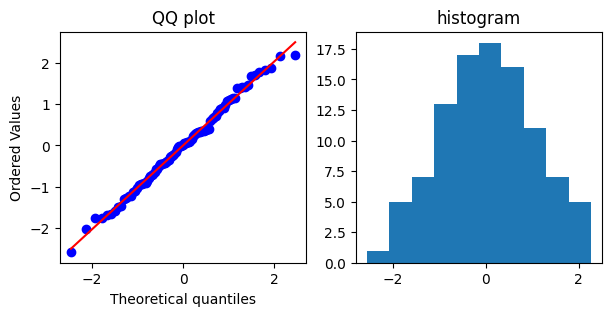

In [36]:
# 정규성 검정
from scipy.stats import shapiro, anderson, jarque_bera, kstest, zscore, probplot

data = norm.rvs(size=100, random_state=0) # 정규성을 만족하는 크기 100의 표본 생성

# 1) Shaprio
stat , p = shapiro(data)

# 2) Derling Anderson : 검정통계량, 임계치, 유의수준
dstat, cv, sl = anderson(data, dist = 'norm')
print(dstat, cv[2], sl[2]*0.01)

# 3) Kstest (콜모고로프 스미르노프) : 검정통계량, p-value
kstat, p = kstest(data, cdf = norm.cdf)

# 4) Jarque_bera : 검정통계량, P-value , 왜도(skew) , 첨도(kurtosis)를 반환
jstat, p = jarque_bera(data)

# 5) QQ Plot and histogram
from matplotlib import pyplot as plt
zdata = zscore(data)
fig, ax = plt.subplots(1,2, figsize  = (7,3))

(osm, odr) , (slope, intercept, r) = probplot(zdata, plot = ax[0])
ax[0].set_title('QQ plot')
ax[1].hist(data)
ax[1].set_title('histogram')

plt.show()

- 2. 등분산성 : y 의 분산은 동일하다.
  * 귀무 : 등분산이다.
  * 대립 : 등분산이 아니다.
  * 정규성 만족 : Barlett 검정  / 정규성 만족 X : Levene 검

In [37]:
from scipy.stats import levene
data1 = norm.rvs(size=100, random_state=0)
data2 = norm.rvs(size=100, random_state=0)

levene(data1, data2)
from scipy.stats import bartlett
s, p = bartlett(data1, data2)

###  ONE WAY ANOVA
* Anova_oneway : 정규성, 등분산, 샘플 사이즈 같음 - Tukey HSD

6.952861952861953 0.002175486114794491
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


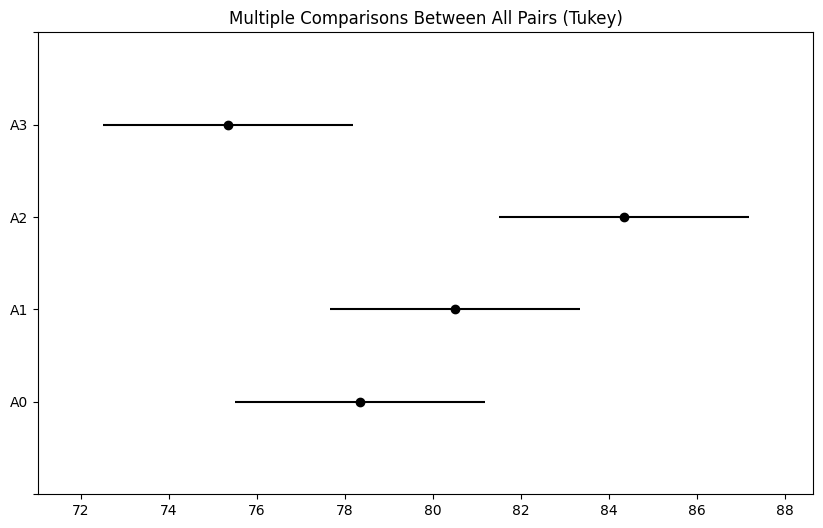

In [38]:
data = pd.DataFrame({"A0":[76,80,78,79,83,74],
                  'A1':[82,75,83,78,85,80],
                  'A2':[79,87,88,86,84,82],
                  'A3':[81,74,76,78,73,70]})


# 데이터를 행과 열 variable, value 으로 melt
# 1) avona_onway 함수
from statsmodels.stats.oneway import anova_oneway
melt_df = data.melt()

oa = anova_oneway(data = melt_df['value'] ,
                  groups = melt_df['variable'],
                  use_var = 'equal')

print(oa.statistic , oa.pvalue)

# 2) anova_lm
from statsmodels.stats.anova import anova_lm
anova_model = smf.ols("value ~ variable", data = melt_df).fit()
anova_model.summary()


# 3) 사후검정
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = melt_df['value'] ,
                     groups  = melt_df['variable']).tukeyhsd(alpha = 0.05)
print(mc.summary())
mc.plot_simultaneous()
plt.show()

* Anova_oneway : 정규성, 등분산, 샘플 사이즈 다름

     0   1   2   3     4     5
A0  81  75  69  90  72.0  83.0
A1  65  80  73  79  81.0  69.0
A2  72  67  62  76  80.0   NaN
A3  89  94  79  88   NaN   NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1     2.25  0.999 -17.8911 22.3911  False
     0      2     -6.0 0.9212 -26.1411 14.1411  False
     0      3      6.5 0.8938 -13.6411 26.6411  False
     0      4   0.9167    1.0 -20.8382 22.6716  False
     0      5    -0.75    1.0 -25.4177 23.9177  False
     1      2    -8.25 0.7645 -28.3911 11.8911  False
     1      3     4.25 0.9809 -15.8911 24.3911  False
     1      4  -1.3333 0.9999 -23.0882 20.4216  False
     1      5     -3.0 0.9985 -27.6677 21.6677  False
     2      3     12.5 0.3781  -7.6411 32.6411  False
     2      4   6.9167 0.8995 -14.8382 28.6716  False
     2      5     5.25 0.9802 -19.4177 29.9177  False
     3      4  -5.5833 0.9563 -27.3

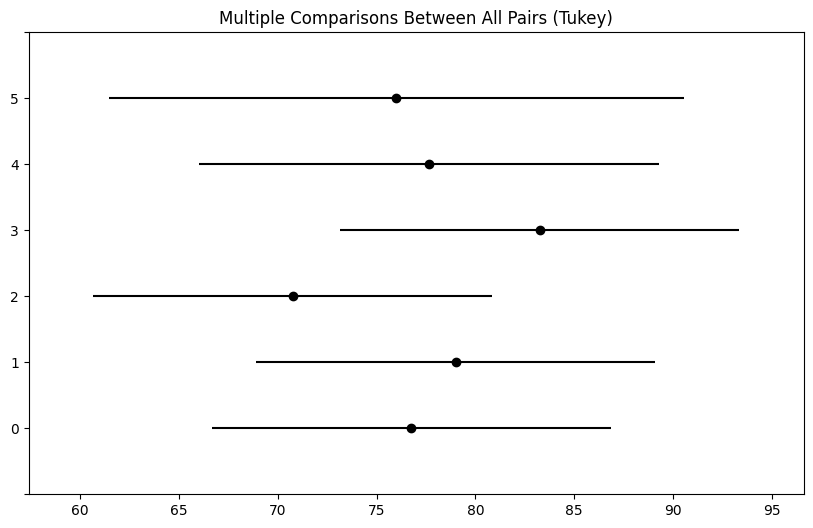

In [39]:
data = [[81,75,69,90,72,83],[65,80,73,79,81,69],[72,67,62,76,80],[89,94,79,88]]
data =  pd.DataFrame(data, index = ['A%d' %i for i in range(len(data))])
print(data)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('value ~ variable', data = data.melt().dropna()).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd( data.melt().dropna()['value'],
                             data.melt().dropna()['variable'])

print(posthoc)
posthoc.plot_simultaneous()
plt.show()

기출 예제 문제 ADP 29회
- 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도이다.</br>
 (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

            df      sum_sq    mean_sq          F    PR(>F)
name       3.0  236.534027  78.844676  24.976953  0.000003
Residual  16.0   50.507154   3.156697        NaN       NaN


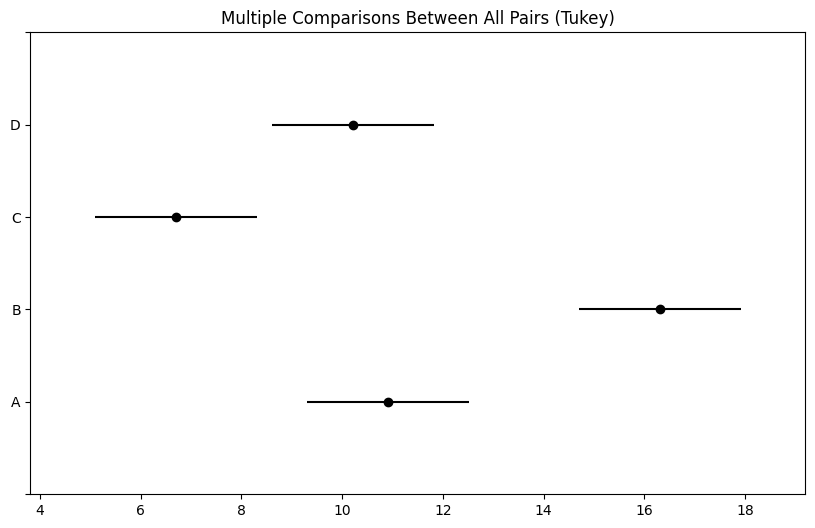

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')

# 귀무가설 : 차종별 범퍼 파손 정도는 같다.
# 대립가설 : 적어도 하나의 차종의 범퍼 파손 정도는 다르다.

from statsmodels.formula.api import ols

model = ols('ratio ~ name', data = df).fit()
anova_table =  sm.stats.anova_lm(model)
print(anova_table )

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df['ratio'] , df['name'], alpha = 0.05)
tukey.summary()

tukey.plot_simultaneous()
plt.show()

###  TWO WAY ANOVA
* 요인이 2개
- 교호작용검정  
 * 귀무 : am과 cyl 사이에는 교호작용 효과가 있다.
 * 대립 : am과 cyl 사이에는 교호작용 효과가 없다.

- 주효과 검정
 * 1) 귀무 : am에 따른 mpg의 차이가 존재한다.
 * 2) 대립 : am에 따른 mpg의 차이가 존재하지 않는다.
 * 3) 귀무 : cyl에 따른 mpg의 차이가 존재한다.
 * 4) 대립 : cyl에 따른 mpg의 차이가 존재하지 않는다.

In [41]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# am/ cyl 별 (요인 2개)별 mpg 값의 차이

# 1) 정규성 검정
lst =[]
cyl_lst = df['cyl'].unique()
am_lst = df['am'].unique()

for cyl in cyl_lst:
    for am in am_lst:
      if (cyl, am) not in lst :
        stat, p = shapiro(df[df['cyl'] == cyl]['mpg'])
        lst.append([cyl, stat, p])
        stat, p = shapiro(df[df['am'] == am]['mpg'])
        lst.append([am, stat, p])

res = pd.DataFrame(lst, columns  = ['Groups','Stats','P_val'])
print('정규성 검정')
print(res.drop_duplicates(subset = ['Groups']))


# 2) 등분산 검정
lst_2 = []
for cyl in cyl_lst :
  for am in am_lst :
    cyl_group_data = df[df['cyl'] == cyl]['mpg']
    cyl_not_group_data = df[df['cyl'] != cyl]['mpg']

    stat, p = levene(cyl_group_data ,cyl_not_group_data )
    lst_2.append([cyl, stat, p])

    am_group_data = df[df['am'] == am]['mpg']
    am_not_group_data = df[df['am'] != am]['mpg']

    stat, p = levene(am_group_data ,am_not_group_data )
    lst_2.append([am, stat, p])


le_rest= pd.DataFrame(lst_2, columns = ['Variable', 'Stat', 'P_val'])
print("")
print("등분산검정")
print(le_rest.drop_duplicates(subset= 'Variable'))


정규성 검정
   Groups     Stats     P_val
0       6  0.899035  0.325178
1       1  0.945804  0.536273
3       0  0.976774  0.898736
4       4  0.912439  0.260593
8       8  0.931753  0.322856

등분산검정
   Variable      Stat     P_val
0         6  7.894492  0.008645
1         1  4.187626  0.049571
3         0  4.187626  0.049571
4         4  2.813915  0.103841
8         8  3.997627  0.054693


                df      sum_sq     mean_sq          F        PR(>F)
C(cyl)         2.0  824.784590  412.392295  44.851657  3.725274e-09
C(am)          1.0   36.766919   36.766919   3.998759  5.608373e-02
C(cyl):C(am)   2.0   25.436511   12.718256   1.383233  2.686140e-01
Residual      26.0  239.059167    9.194583        NaN           NaN


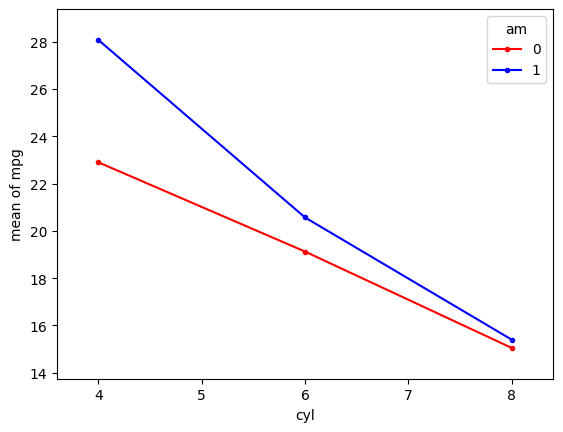

In [42]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

f =  'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(f, data = df).fit()
anova_table = anova_lm(model)
print(anova_table)


from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df['cyl'], df['am'], df['mpg'] , colors = ['red','blue'])
plt.show()

기출 예제 문제 2) </br>
 네 가지 종류의 비료와 세 가지 벼품종에 대한 쌀 수확량을 조사하기 위하여 한 농업 시험장에서 각 수준에 대한 3회 반복 실험을 한 자료
* 비료와 벼의 각 수준별 조합에 대한 수확량 평균을 구하라.
* 비료와 벼품종의 주효과를 검정하고 두 인자의 교호작용에 대하여 검정하라.
* 이원분산분석 검정 결과를 확인하라

In [43]:
df = pd.DataFrame(
    {
        '벼품종1': [[64, 66, 70], [65, 63, 58], [59, 68, 65], [58, 50, 49]],
        '벼품종2': [[72, 81, 64], [57, 43, 52], [66, 71, 59], [57, 61, 53]],
        '벼품종3': [[74, 51, 65], [47, 58, 67], [58, 45, 42], [53, 59, 38]],
    }
)
df

data = {'비료' : [], '벼품종' : [] , '수확량' : [] }

for 비료_index, 벼품종_value in enumerate(df.values) :
  for 벼품종, 수확량_list in enumerate(벼품종_value , start = 1) :
    for 수확량 in 수확량_list :
      data['비료'].append(비료_index + 1)
      data['벼품종'].append(벼품종)
      data['수확량'].append(수확량)

df2 = pd.DataFrame(data)
df2.head(4)

,비료,벼품종,수확량
0,1,1,64
1,1,1,66
2,1,1,70
3,1,2,72


                df       sum_sq     mean_sq         F    PR(>F)
C(비료)          3.0  1002.888889  334.296296  6.017333  0.003307
C(벼품종)         2.0   342.388889  171.194444  3.081500  0.064393
C(비료):C(벼품종)   6.0   588.944444   98.157407  1.766833  0.148795
Residual      24.0  1333.333333   55.555556       NaN       NaN


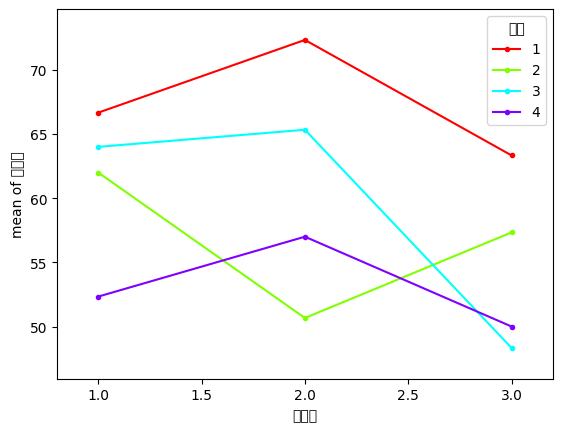

In [44]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

f = "수확량 ~ C(비료) + C(벼품종) + C(비료):C(벼품종)"
model = ols(f, data = df2).fit()
table = anova_lm(model)
print(table)

interaction_plot(df2['벼품종'], df2['비료'], df2['수확량'])
plt.show()



Type III ANOVA : 비균형설계자료

In [45]:
df_poison = pd.read_csv("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv", index_col=0)
df_poison = df_poison.iloc[1:,:].reset_index(drop=True)
print(df_poison["treat"].value_counts())

treat
B    12
C    12
D    12
A    11
Name: count, dtype: int64


In [46]:
# 데이터가 불균형 자료 일 경우 typ = 3 으로 지정
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', df_poison).fit()
anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.598533,1.0,26.627969,0.000010
C(poison),0.096206,2.0,2.140041,0.132793
C(treat),0.367098,3.0,5.443909,0.003525
C(poison):C(treat),0.241006,6.0,1.787011,0.130406
Residual,0.786717,35.0,NaN,NaN


기출 예제 문제 ADP_27) </br>
지하철 호선과 월별, 승객 수 간 상관관계가 있는 지 확인
1. 귀무가설과 대립가설을 설정하라
2. 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

귀무 : 지하철호선과 월별은 승객 수와 상관관계가 있다. </br>
대립 : 지하철호선과 월별은 승객 수와 상관관계가 없다. </br>

* 주효과 </br>
귀무 : 지하철호선별로 승객수의 차이가 없다. </br>
대립 : 적어도 하나의 지하철 호선에서 승객수의 차이가 있다. </br>

귀무 : 월별로 승객수의 차이가 없다. </br>
대립 : 적어도 하나의 월별로 호선에서 승객수의 차이가 있다.

In [47]:
import pandas as pd
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df_subway.head()

print(df_subway.line.value_counts())
print(df_subway.month.value_counts())

line
1    24
2    24
3    24
Name: count, dtype: int64
month
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
Name: count, dtype: int64


                    df        sum_sq       mean_sq             F        PR(>F)
C(line)            2.0  2.147444e+06  1.073722e+06  10362.998525  2.007247e-50
C(month)          11.0  3.206533e+04  2.915030e+03     28.134341  2.103496e-14
C(line):C(month)  22.0  9.696908e+04  4.407686e+03     42.540665  1.582232e-19
Residual          36.0  3.730000e+03  1.036111e+02           NaN           NaN


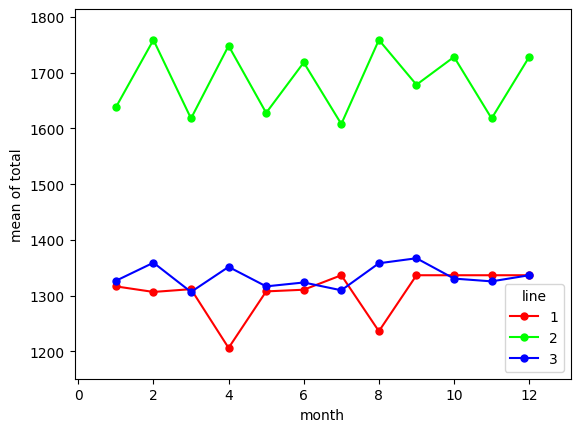

In [48]:
f = "total ~ C(line) * C(month)"
m = ols(f, data = df_subway).fit()
print(anova_lm(m))

interaction_plot(df_subway['month'],df_subway['line'], df_subway['total'] ,ms=10)
plt.show()

연습 문제 1)
- 모분산의 정보가 없을때, 모평균에 대한 95% 신뢰수준의 신뢰 구간을 구하라. </br>
  다음 데이터의 모표준편차가 3이라는 것을 알고 있을때 모평균에 대한 95% 신뢰구간을 구하라.

In [49]:
data = [10, 19, 15, 11, 13, 14, 18]

x = np.mean(data)
s = np.std(data, ddof =1)
n = len(data)
df = n - 1
conf_a = 0.05

from scipy.stats import t
# 1) 모분산을 모를때
# SE
se = s / np.sqrt(n)
# t_confa
conf_t =  t.ppf(1 - conf_a / 2, df)
# ME
ME = se * conf_t
print(x-ME, x + ME)


# 2) 모표준편차가 3일때 - norm
conf_z = norm.ppf(1 - conf_a /2)

ME2 = se * conf_z
print(x - ME2, x + ME2)

11.185329061331894 17.386099510096678
11.802321442957727 16.769107128470846


ADP_기출 24)
- 모분산을 모르는 경우 데이터의 95% 신뢰구간

In [125]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

n = len(data)
mean = np.mean(data)
s = np.std(data)
df = n - 1
conf_a = 0.05

# SE
se = s / np.sqrt(n)
# t_confa
conf_t = stats.t.ppf(1 - conf_a / 2, df)
# ME
ME = se * conf_t
print(mean - ME, mean + ME)


3.501247690268752 4.276530087509026


연습 문제 2)
- 어느 제조회사의 불량률이 5%으로 알려져 있다면 95% 신뢰수준에서 오차의 한계가 3%가 되로록 하는 최소 표본 사이즈를 구하시오.

In [50]:
p = 0.05
conf_a = 0.05
ME = 0.03

# conf_z
conf_z = norm.ppf(1 - conf_a/2)

size = conf_z **2 * p * (1-p)  / ME**2
print(size)

202.74365998107885


연습 문제 3)
- 임의로 추출한 표본 30개의 분산을 계산 했더니 50일떄, 신뢰도 95%의 신뢰구간을 추정하시오.

In [51]:
n = 30
var = 50
conf_a = 0.05
df = n - 1

from scipy.stats import chi2
c1 = chi2.ppf(1 - conf_a / 2, df)
c2 = chi2.ppf(conf_a/2, df)

cr1 = df * var / c1
cr2 = df * var / c2

print(round(cr1,2), round(cr2, 2))

31.71 90.36


연습 문제 4)
- 뽑기 기계에서 20번 뽑기를 했더니 그 중 5개는 미니카였다. 장남감들 중 미니카의 비율을 P라고 한다면 모비율 P에 대한 95% 신뢰구간을 구하시오

In [52]:
# 표본 비율로 모비율을 추정
p = 5 / 20
n = 20
conf_a = 0.05

# se
se = np.sqrt(p * (1-p) / n)
# conf_z
conf_z = norm.ppf(1- conf_a / 2)
# ME
ME = se * conf_z
print(p - ME, p + ME)

0.060227303217750994 0.439772696782249


연습 문제 5)
- A 국가의 성인 남성의 흡연율이 35%이라고 했으나, B는 그것보다 높은 수치를 예상했다. 남성 중 450명을 임의 추출하여 조사한 결과 180명이 흡연자인것을 확인했따. 이에 대해 귀무/대립가설을 세우고, 검정통계량을 계산하라.

In [61]:
p0 = 0.35
n = 450
p = 180 / 450
conf_a = 0.05
# 귀무 가설 : 남성의 흡연율을 35%와 차이가 없다.
# 대립 가설 : 남성의 흡연율을 35%보다 높다. x > 35 (우측 검정)

from scipy.stats import norm

# se
se = np.sqrt(p0 * (1 - p0) / n)

# zstat
zstat = (p - p0) / se

sp = 1 - norm.cdf(zstat)
cv = norm.ppf(1 - conf_a)


print(f"유의수준 {conf_a} , 유의확률 {sp}")
print(f"임계값 {cv}, 검정 통계량 {zstat}")

유의수준 0.05 , 유의확률 0.013082703570710397
임계값 1.6448536269514722, 검정 통계량 2.2237479499833053


연습 문제 6)
- 모평균을 모르는 상황에서 표본의 정보를 통해 모분산 10인지 아닌지 여부를 검정.
50개의 표본을 임의로 추출한 결과 표본의 부산은 8.8이였다. 귀무/대립 가설을 세우고, 검정 통계량을 계산하여 검정 결과를 서술하시오 (유의수준 0.05)

In [72]:
import scipy.stats as stats

n = 50
v = 8.8
v0 = 10
df = n-1
conf_a = 0.05

# 귀무: 모분산은 10이다
# 대립: 모분산은 10이 아니다.

# 검정 통계량 계산
cstat = df * v / v0

# 양측 검정
cv1 = stats.chi2.ppf(conf_a / 2, df=n-1)
cv2 = stats.chi2.ppf(1 - conf_a / 2, df=n-1)

if chi2.cdf(cstat, df) < 0.5 :
  sp = (chi2.cdf(cstat, df)) * 2

else :
  sp = (1 - chi2.cdf(cstat,df)) * 2

if cstat < cv1 or cstat > cv2 :
  print('귀무가설 기각')
else :
  print('귀무가설 채택')

print("1. 유의수준 {:.3f}와 유의확률 {:.3f}를 비교".format(conf_a, sp))
print("2. 임곗값 {:.3f}, {:.3f}와 검정통계량 {:.3f}를 비교".format(cv1,cv2, cstat))

귀무가설 채택
1. 유의수준 0.050와 유의확률 0.581를 비교
2. 임곗값 31.555, 70.222와 검정통계량 43.120를 비교


연습문제 7)
- 50명의 당뇨 환자에 대해 신약 투약 이전과 이후의 평균 혈당 차이가 15, 표준편차 4일 때, 투약 전후의 평균 혈당의 차이가 존재하는지 확인하고자한다.

In [74]:
# 귀무 : 차이가 없다
# 대립 : 차이가 있다.

n = 50
diff = 15
s = 4
conf_a = 0.05
df = n -1
d0 = 0

# se
se = s / np.sqrt(n)

# tstat
tstat = (diff - d0) / se

sp =( 1 - t.cdf(np.abs(tstat), df)) * 2
cv = t.ppf(1 - conf_a / 2, df)

print(conf_a, sp)
print(cv, tstat)
print(f"유의확률인 {sp}가 0.05보다 작기 때문에 귀무가설을 기각 할 수 있다")

0.05 0.0
2.0095752371292397 26.516504294495533


연습 문제 8) </br>
가수 A에 대한 호감도가 남녀별로 다른지 알아보고자 다음과 같은 데이터, 남녀 별 지지율에 대한 차이가 있는 지 검정 </br>

* 남성 (100명) 30% 호감
* 여성 (180명) 35% 호감

In [75]:
n1 = 100
p1 = 0.3

n2 = 180
p2 = 0.35

conf_a = 0.05

# 귀무 : 차이가 없다
# 대립 : 차이가 있다.
d0 = 0

# 합동비율
pe = (n1 * p1 + n2 * p2) / (n1 + n2)
se = np.sqrt(pe * (1 - pe) * (1/n1 + 1/n2))

z_stat = (p1 - p2) / se

sp = (1 - norm.cdf(abs(z_stat))) * 2
print(z_stat, sp)

-0.8511831054314234 0.3946676461708256


연습 문제 9)
- A 브랜드의 제품 14개를 추출하여 구한 평균과 표준 편차는 100, 5 이고, B 브랜드의 제품 12개를 구한 평균과 표준편차는 110, 6이면 두 제품의 평균 차이가 있는가.

In [76]:
# 모분산이 다른 독립표본 t검정
n1 , n2 = 14 , 12
x1 , x2 = 100 , 110
s1 , s2 = 5 , 6

d0 =0
# 차이
diff = x1 - x2

df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2/n2)**2))
SE = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0)/SE
sp = (1-t.cdf(np.abs(tstat), df))*2 # two-way
print("검정통계량 {:.3f}, 유의확률 {:.3f}".format(tstat, sp))
# 검정통계량의 유의확률이 유의수준인 0.05보다 작기 때문에 귀무가설을 기각할 수 있다.
# 즉, 두 제품의 평균은 차이가 있다.

검정통계량 -4.571, 유의확률 0.000


ADP_기출 24)
- 생산라인의 12개 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 12개 제품 평균은 5.6mm이고 표준편차는 0.04이다. 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하라 Z(0.05) = 1.96

In [122]:
x1 = 5.7
s1 = 0.03

x2 = 5.6
s2 = 0.04

n = 12
df = 2*n - 2
conf_a = 0.05
# 1) se
se = np.sqrt(s1**2/n + s2**2/n)
# t_stat
t_stat = (x1 - x2) / se


sp = (1 - stats.t.cdf(np.abs(t_stat),df)) * 2
cv = stats.t.ppf(1 - conf_a/2, df)

print(t_stat, sp)

6.928203230275546 5.892973662380285e-07


연습 문제 10 )
- iris target별로 sepal length의 평균의 차이가 있는 검정하고, 사후 검정

In [91]:
from sklearn.datasets import load_iris
load = load_iris()
feature_names = list(map(lambda x : x.replace("(cm)","").replace(' ', '') , load['feature_names']))

data = pd.DataFrame(np.c_[load['data'], load['target']] , columns = feature_names + ['target'])
data['target'] = data['target'].map({0 : load['target_names'][0] ,1: load['target_names'][1] , 2 : load['target_names'][2]})


from statsmodels.stats.anova import anova_lm
anova_model = smf.ols("sepallength ~  target", data = data).fit()


import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('sepallength ~  C(target)', data = data).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(target),2.0,63.212133,31.606067,119.264502,1.669669e-31
Residual,147.0,38.956200,0.265008,NaN,NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


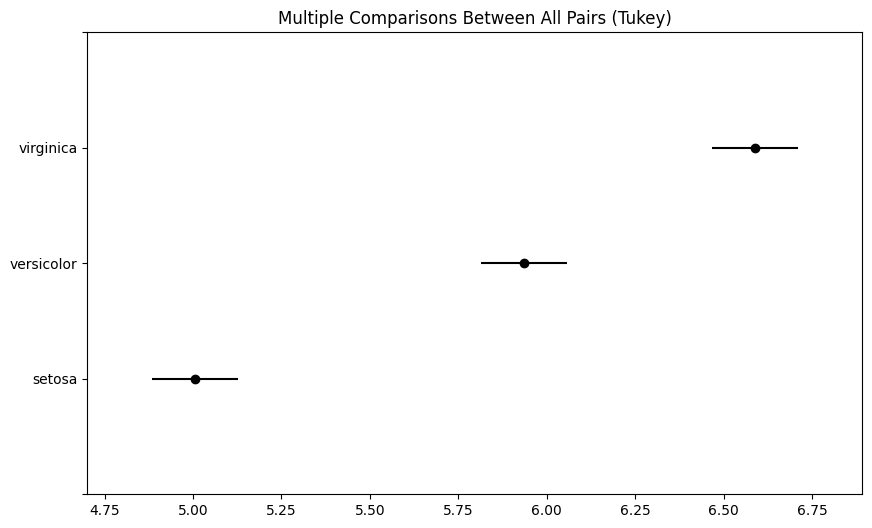

In [92]:
# ) 사후검정
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = data['sepallength'] ,
                     groups  = data['target']).tukeyhsd(alpha = 0.05)
print(mc.summary())
mc.plot_simultaneous()
plt.show()